In [235]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

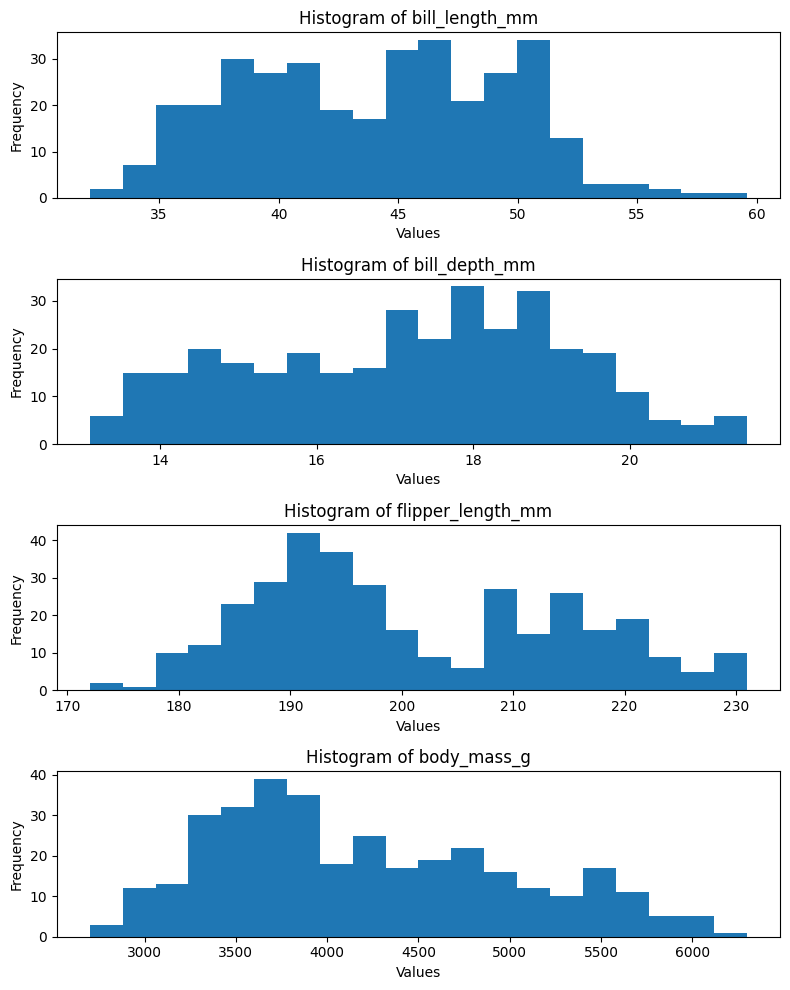

In [236]:
penguins = load_penguins()
penguins.describe()

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is stored in the variable 'df'
columns_to_plot = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']  # Specify the columns you want to plot

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 10))

for i, column in enumerate(columns_to_plot):
    axes[i].hist(penguins[column], bins=20)  # Adjust the number of bins as needed
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')
    


plt.tight_layout()
plt.show()


fig = px.pie(penguins.dropna(), names='island')
fig.show()

fig = px.pie(penguins.dropna(), names='species')
fig.show()

fig = px.pie(penguins.dropna(), names='sex')
fig.show()



In [237]:
attributeNames = np.asarray(penguins.columns) # Headers (attribute names)
print(penguins.shape)
print(attributeNames)

(344, 8)
['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


In [238]:
# Inspect the data
print(penguins.to_string())  # String representation of the dataframe

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
8       Adelie  Torgersen            34.1           18.1              193

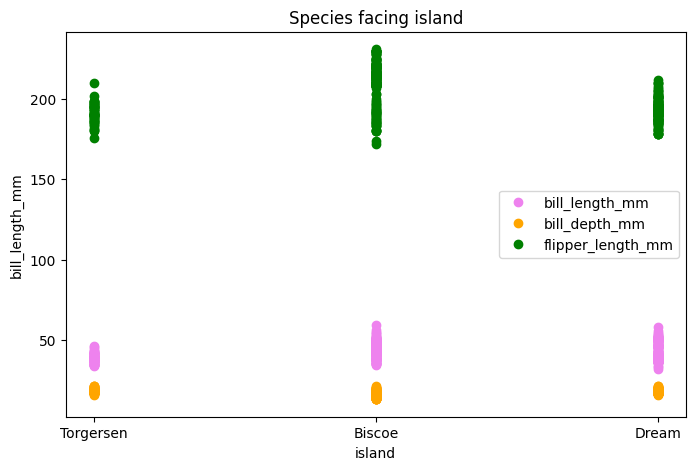

In [239]:
# Celia test 1
plt.figure(figsize=(8,5))
plt.title('Species facing island')
plt.xlabel(attributeNames[1])
plt.ylabel(attributeNames[2])
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[2]], 'o', color='violet')
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[3]], 'o', color='orange')
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[4]], 'o', color='green')
plt.legend(attributeNames[2:5])
plt.show()


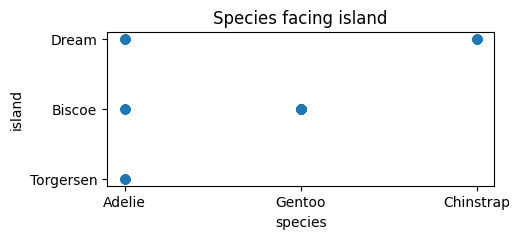

In [240]:
# Celia test species facing island
plt.figure(figsize=(5,2))
plt.title('Species facing island')
plt.xlabel(attributeNames[0])
plt.ylabel(attributeNames[1])
#make size of dots larger if larger number of observations have it
plt.plot(penguins[attributeNames[0]], penguins[attributeNames[1]], 'o')
plt.show()


# 1 - Preprocessing and transformations.

Only problem seems to be the Nans, those objects (rows) will now be deleted.

## 1.1 - Start removing Nans and making a visual inspection

(333, 8)
(344, 8)
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
12      Adelie  Torgersen            41.1           17.6              182.0       3200.0  female  2007
13      Adelie  Torgersen            38.6           21.

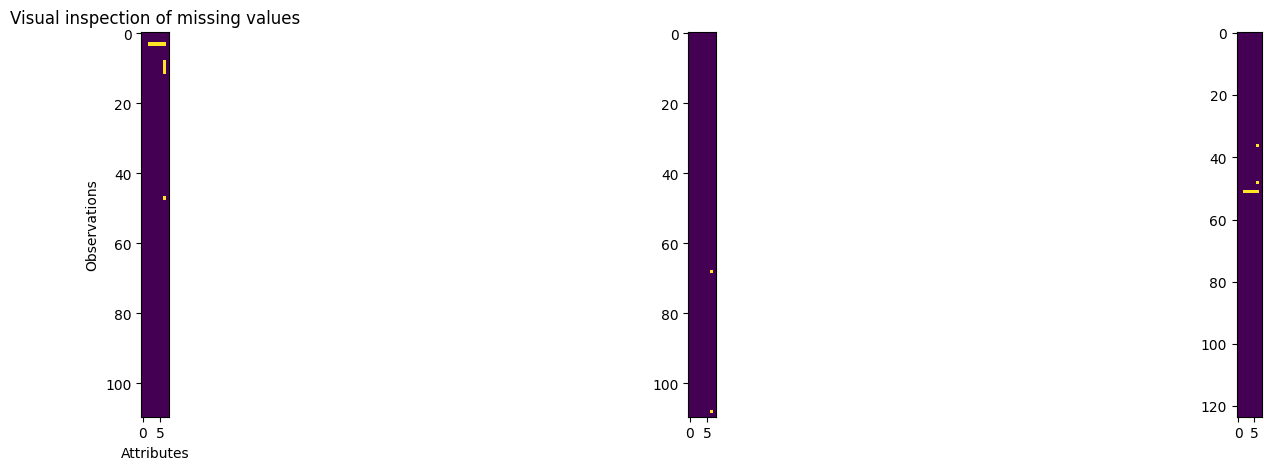

In [241]:
## Missing values - visual inspection

missing_idx=penguins.isnull()    # True if an element is missing (NaN)
obs_row_missing = np.sum(missing_idx, 1) > 0  # Axis 1 is rows!!
obs_drop_missing = penguins.iloc[np.logical_not(obs_row_missing).values,:] # Delete observations with missing values

print(obs_drop_missing.shape)
print(penguins.shape)


## Visual Inspection of Missing Values

print(obs_drop_missing.to_string())

# Another approach is to first investigate where the missing values are.
# A quick way to do this is to visually look at the missing_idx:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Visual inspection of missing values')
plt.imshow(missing_idx.iloc[:110,:])
plt.ylabel('Observations'); plt.xlabel('Attributes')
plt.subplot(1,3,2)
plt.imshow(missing_idx.iloc[110:220,:])
plt.subplot(1,3,3)
plt.imshow(missing_idx.iloc[220:,:])

plt.show()



penguins = obs_drop_missing # update penguins with no missing values

## 1.2 - Standarization of continuous variables.

In [242]:
# Standarize the data
X = np.matrix(penguins.iloc[:,2:6].values, dtype=float) # Convert pandas DataFrame to matrix

X = (X - X.mean(axis=0)) / X.std(axis=0) # Standardize X
penguins.iloc[:,2:6]= X    # Update penguins with standardized data

display(penguins.describe())
# Check that it worked -> mean approximately zero, std approximately 1
print(X[:,2:6].mean(axis=0))
print(X[:,2:6].std(axis=0))



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,333.000000
mean,-3.499370e-15,-1.280257e-15,2.133762e-16,-1.280257e-16,2008.042042
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,0.812944
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,2007.000000
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,2007.000000
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,2008.000000
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,2009.000000
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,2009.000000


[[ 3.33900408e-16 -3.36734311e-17]]
[[1. 1.]]


In [243]:
a=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Torgersen')].count()[0]
b=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Biscoe')].count()[0]
c=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Dream')].count()[0]
print(f"Adelie:    {a} Torgersen , {b} Biscoe, {c} Dream")
a=penguins[(penguins['species']=='Gentoo')].count()[0] #Torgersen
b=penguins[(penguins['species']=='Chinstrap')].count()[0]
print(f"Gentoo:    {a}")
print(f"Chinstrap: {b}")

Adelie:    47 Torgersen , 44 Biscoe, 55 Dream
Gentoo:    119
Chinstrap: 68


# 1.3 - Drop years

In [244]:
penguins.drop(['year'], axis=1, inplace=True)
print(penguins.to_string())


       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen       -0.896042       0.780732          -1.426752    -0.568475    male
1       Adelie  Torgersen       -0.822788       0.119584          -1.069474    -0.506286  female
2       Adelie  Torgersen       -0.676280       0.424729          -0.426373    -1.190361  female
4       Adelie  Torgersen       -1.335566       1.085877          -0.569284    -0.941606  female
5       Adelie  Torgersen       -0.859415       1.747026          -0.783651    -0.692852    male
6       Adelie  Torgersen       -0.932669       0.323014          -1.426752    -0.723946  female
7       Adelie  Torgersen       -0.877728       1.238450          -0.426373     0.582014    male
12      Adelie  Torgersen       -0.529772       0.221299          -1.355296    -1.252549  female
13      Adelie  Torgersen       -0.987609       2.052171          -0.712196    -0.506286    male
14      Adelie  Torgersen     

## 1.3 - One hot encoding and binarization


In [245]:
Ksp = 0
X = penguins.values

# Change species to numbers and set it as first column
species = np.asarray(penguins['species'])  # attribute species for each penguin
speciesNames = np.unique(species)          # unique species names
speciesDict = dict(zip(speciesNames, range(len(speciesNames))))
species_num = np.matrix([speciesDict[value] for value in species]) 

X = penguins.drop(['species'], axis=1).values
X = np.concatenate((species_num.T, X), axis=1) 


doing the encoding another way but just for my part (enrikito)

Male-->1
Female-->0

In islands:

[0,1]--->Togersen

[1,0]--->dream

[0,0]--->biscoe

In [246]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer


# You can replace 'column_index' with the actual index of the column you want to encode
X_e = np.array(X)
# Create an instance of the OneHotEncoder
encoderOnHot = OneHotEncoder(drop='first',sparse=False)
# Reshape the column to a 2D array as OneHotEncoder expects a 2D input
column_ilands = X_e[:, 1].reshape(-1, 1)
# Fit and transform the column using the encoder
encoded_column_islands = encoderOnHot.fit_transform(column_ilands)


binarizer = LabelBinarizer()
Column_sex = X_e[:, 6].reshape(-1, 1)
# Binarize the 'sex' column
binarized_column_sex = binarizer.fit_transform(Column_sex)

Penguins_e = pd.DataFrame(X_e)
column_names = ['Species', 'island', 'bill_L', 'bill_D', 'flipper_L', 'body mass', 'sex']
Penguins_e.columns = column_names

Penguins_e['sex'] = binarized_column_sex
Penguins_e.insert(2, 'oneHotIsland', encoded_column_islands.tolist())

print(penguins.describe())




       bill_length_mm  bill_depth_mm  flipper_length_mm   body_mass_g
count    3.330000e+02   3.330000e+02       3.330000e+02  3.330000e+02
mean    -3.499370e-15  -1.280257e-15       2.133762e-16 -1.280257e-16
std      1.001505e+00   1.001505e+00       1.001505e+00  1.001505e+00
min     -2.177987e+00  -2.067291e+00      -2.069852e+00 -1.874435e+00
25%     -8.227879e-01  -7.958519e-01      -7.836512e-01 -8.172292e-01
50%      9.288742e-02   6.872642e-02      -2.834620e-01 -1.953432e-01
75%      8.437412e-01   7.807321e-01       8.598276e-01  7.063915e-01
max      2.858227e+00   2.204743e+00       2.146028e+00  2.603144e+00


c:\Users\enriq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



## Basics summary satistics


box plot for data with a distribution

In [247]:


fig = px.box(Penguins_e[['bill_L', 'bill_D', 'flipper_L', 'body mass']],points='all')
fig.show()


Species           int64
island          float64
oneHotIsland    float64
bill_L          float64
bill_D          float64
flipper_L       float64
body mass       float64
sex               int32
dtype: object
               Species  island  oneHotIsland    bill_L    bill_D  flipper_L  \
Species       1.000000     NaN           NaN  0.730548 -0.740346   0.850737   
island             NaN     NaN           NaN       NaN       NaN        NaN   
oneHotIsland       NaN     NaN           NaN       NaN       NaN        NaN   
bill_L        0.730548     NaN           NaN  1.000000 -0.228626   0.653096   
bill_D       -0.740346     NaN           NaN -0.228626  1.000000  -0.577792   
flipper_L     0.850737     NaN           NaN  0.653096 -0.577792   1.000000   
body mass     0.750434     NaN           NaN  0.589451 -0.472016   0.872979   
sex           0.010964     NaN           NaN  0.344078  0.372673   0.255169   

              body mass       sex  
Species        0.750434  0.010964  
island    

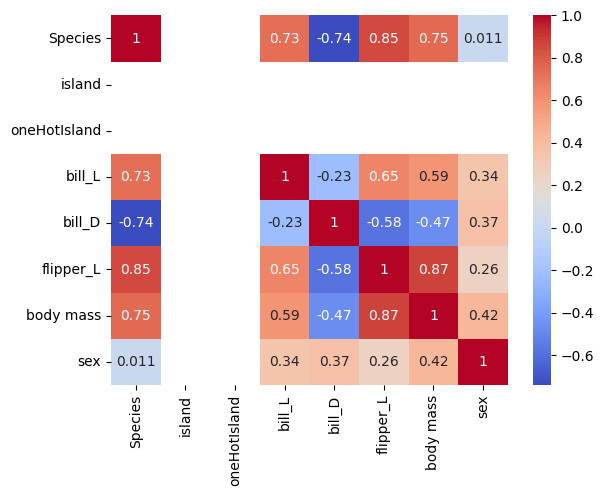

In [248]:

# Assuming your DataFrame is stored in the variable 'df'
for column in Penguins_e.columns:
    Penguins_e[column] = pd.to_numeric(Penguins_e[column], errors='coerce')

print(Penguins_e.dtypes)

corr_matrix = Penguins_e.corr()
print(corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

In [249]:
fig = px.scatter(x=Penguins_e['body mass'], y=Penguins_e['flipper_L'],
    labels={"x":"body mass",
    "y":"flipper L"},
    title='scatter1')

fig.show()

In [250]:
## One-out-of-K encoding 

# Of 'species' attribute
"""   # extract unique labels and assign number
species = np.asarray(penguins['species']) # attribute species for each penguin
speciesNames = np.unique(species) # unique species names
speciesDict = dict(zip(speciesNames,range(len(speciesNames))))
species_num = np.array([speciesDict[value] for value in species]) 
  # Preallocate memory, then extract data to matrix X
Ksp=len(speciesNames)
species_encoding = np.zeros((species.size, Ksp),dtype=int)
species_encoding[np.arange(species.size), species_num] = 1 

X=penguins.drop(['species'],axis=1).values
X= np.concatenate((species_encoding,X),axis=1)  # for interpretations, see speciesDict """

Ksp = 0
X = penguins.values

# Change species to numbers and set it as first column
species = np.asarray(penguins['species'])  # attribute species for each penguin
speciesNames = np.unique(species)          # unique species names
speciesDict = dict(zip(speciesNames, range(len(speciesNames))))
species_num = np.matrix([speciesDict[value] for value in species]) 

X = penguins.drop(['species'], axis=1).values
X = np.concatenate((species_num.T, X), axis=1) 



## 'island' attribute
# extract unique labels and assign number
islands = np.asarray(penguins['island'])   # attribute species for each penguin
islandNames = np.unique(islands)         # unique species names
islandDict = dict(zip(islandNames, range(len(islandNames)))) # dictionary mapping species to number
island_num = np.array([islandDict[value] for value in islands]) 

# Preallocate memory, then extract data to matrix X
Kis = len(islandNames)                  # number of species=3=kis
island_encoding = np.zeros((islands.size, Kis),dtype=int) # Preallocate memory
island_encoding[np.arange(islands.size), island_num] = 1  # Fill with ones

X=np.concatenate((X[:,:Ksp+1], island_encoding,X[:,Ksp+2:]),axis=1)  


##'sex' attribute --> don't need 2 variables, since let's do: 0-female, 1-male (Binarized)
sexes = np.asarray(penguins['sex'])
sexNames = np.unique(sexes)
sexDict = dict(zip(sexNames, range(len(sexNames))))
sex_num = np.matrix([sexDict[value] for value in sexes]) # attribute species for each penguin

X = np.concatenate((X[:,:-1], sex_num.T),axis=1)  # for interpretations, see sexDict X[:,-1]



In [251]:
print(sexDict)
print(islandDict)
print(speciesDict)
penguins = pd.DataFrame(X)
column_names = ['Species', 'island_Bis', 'island_Dream', 'island_Torg', 'bill_L', 'bill_D', 'flipper_L', 'body mass', 'sex']
penguins.columns = column_names
penguins



{'female': 0, 'male': 1}
{'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


,Species,island_Bis,island_Dream,island_Torg,bill_L,bill_D,flipper_L,body mass,sex
0,0,0,0,1,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,0,0,1,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,0,0,1,-0.67628,0.424729,-0.426373,-1.190361,0
3,0,0,0,1,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,0,0,1,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...,...,...
328,1,0,1,0,2.162314,1.340165,0.431094,-0.257532,1
329,1,0,1,0,-0.090248,0.475587,0.073816,-1.003795,0
330,1,0,1,0,1.026876,0.526444,-0.569284,-0.53738,1
331,1,0,1,0,1.246638,0.933305,0.645461,-0.133155,1


## 1.4. Basic statistics

In [252]:
# Assuming your DataFrame is stored in the variable 'df' and the column you want to sum is 'column_name'
FromBisIsland = penguins['island_Bis'].sum()/len(penguins['island_Bis'])
FromDreamIsland = penguins['island_Dream'].sum()/len(penguins['island_Dream'])
FromTorgIsland = penguins['island_Torg'].sum()/len(penguins['island_Bis'])
print(FromBisIsland)
print(FromDreamIsland)
print(FromTorgIsland)

0.4894894894894895
0.36936936936936937
0.14114114114114115


Species           int64
island_Bis        int64
island_Dream      int64
island_Torg       int64
bill_L          float64
bill_D          float64
flipper_L       float64
body mass       float64
sex               int64
dtype: object
               Species  island_Bis  island_Dream  island_Torg    bill_L  \
Species       1.000000    0.596528     -0.315364    -0.419318  0.730548   
island_Bis    0.596528    1.000000     -0.749398    -0.396949  0.225174   
island_Dream -0.315364   -0.749398      1.000000    -0.310248  0.032118   
island_Torg  -0.419318   -0.396949     -0.310248     1.000000 -0.367821   
bill_L        0.730548    0.225174      0.032118    -0.367821  1.000000   
bill_D       -0.740346   -0.626230      0.457326     0.265173 -0.228626   
flipper_L     0.850737    0.601126     -0.425459    -0.273304  0.653096   
body mass     0.750434    0.623702     -0.464666    -0.251369  0.589451   
sex           0.010964    0.009201     -0.000673    -0.012278  0.344078   

                bil

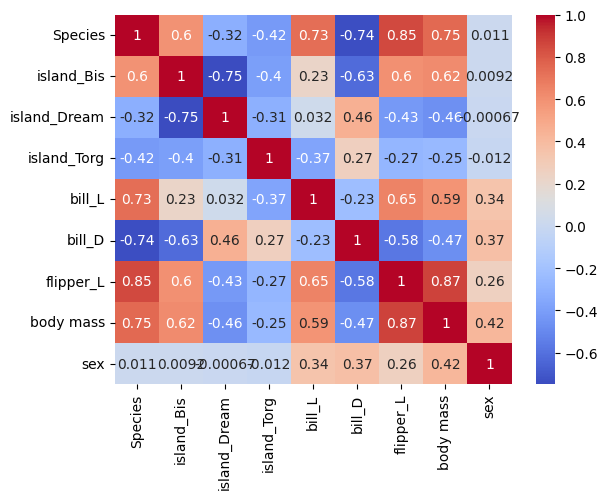

In [253]:
## Do a box plot of the data
for column in penguins.columns:
    penguins[column] = pd.to_numeric(penguins[column], errors='coerce')

print(penguins.dtypes)
corr_matrix_2 = penguins.corr()
print(corr_matrix_2)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(corr_matrix_2, cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

## 2 Data visualization based on a PCA

      As the data has being already standarized, the PCA can be done diretly

In [254]:
# Import the package PCA from sklearn
from sklearn.decomposition import PCA


# Separate the data into attributes X and target class y
X_pca = penguins.iloc[:,1:].values
y_pca = penguins.iloc[:,0].values

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

# Convine the principal components with the target class
data_PCA_all = np.transpose([principalComponents[:,0], principalComponents[:,1], y_pca])

# Create a new dataframe with the principal components
penguins_pca = pd.DataFrame(data_PCA_all, columns=['Principal Component 1', 'Principal Component 2', 'Target Data'])


In [255]:
print(penguins_pca.to_string())

     Principal Component 1  Principal Component 2  Target Data
0                -1.863905               0.096355          0.0
1                -1.409215              -0.647807          0.0
2                -1.476012              -0.409761          0.0
3                -1.960722              -0.293145          0.0
4                -1.936538               0.791985          0.0
5                -1.852084              -0.607097          0.0
6                -0.859624               0.591390          0.0
7                -1.886072              -0.513969          0.0
8                -1.970619               0.955621          0.0
9                -1.579713               0.625358          0.0
10               -1.820272              -0.815015          0.0
11               -1.666226              -0.192207          0.0
12               -0.861754               1.286801          0.0
13               -2.401018              -0.881089          0.0
14               -1.071366               1.865401      

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


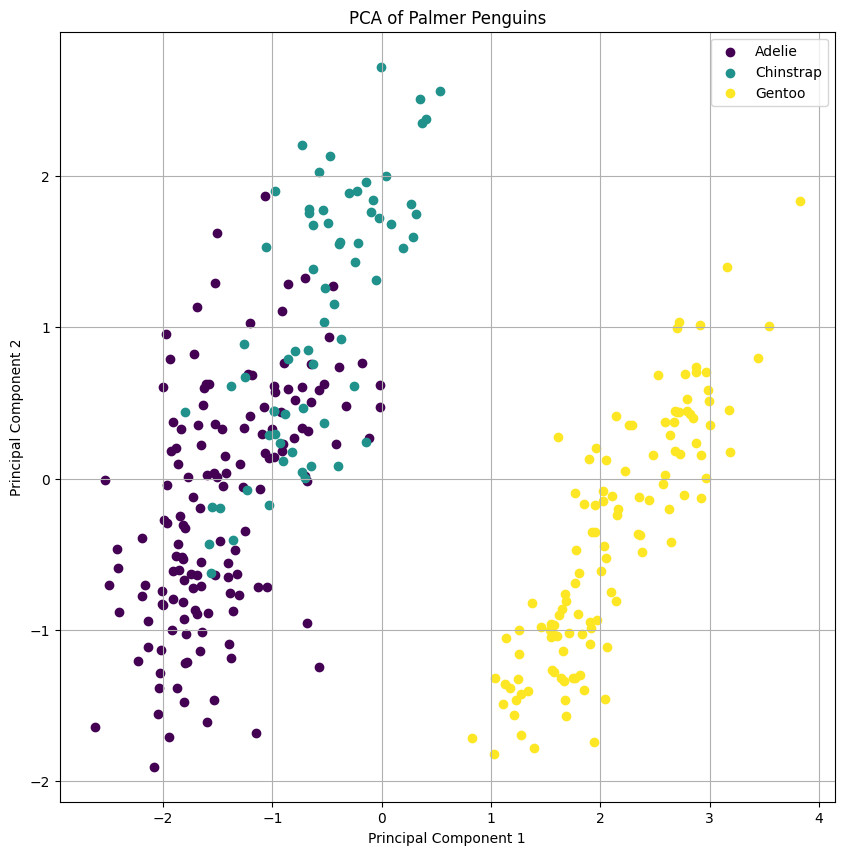

In [256]:

# Assuming y_pca contains the labels for the different classes
unique_labels = list(set(y_pca))
num_labels = len(unique_labels)
cmap = plt.get_cmap('viridis', num_labels)

# Create a colormap with a color for each unique label
#label_colors = ListedColormap(cmap.colors)

# Plot the pca with a legend
plt.figure(figsize=(10, 10))
plt.grid()

# Create scatter plots for each unique label
for i, label in enumerate(unique_labels):
    indices = y_pca == label
    plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Palmer Penguins')

# Show the legend with all entries
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()


How much variance does the principal components represent

In [257]:
# Explained variance of the two principal components
print(sum(pca.explained_variance_ratio_))


0.8009819933840976


DO THE PARETO CHART TO SEE HOW THE PRINCIPAL COMPONETS EXPLAIN THE VARIANCE

In [258]:
# Separate the data into attributes X and target class y
X_pca = penguins.iloc[:,1:].values
y_pca = penguins.iloc[:,0].values

# Perform PCA with 2 components
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_pca)


[0.60251391 0.19846808 0.09961088 0.03224956 0.03056537 0.02198777
 0.01460443]


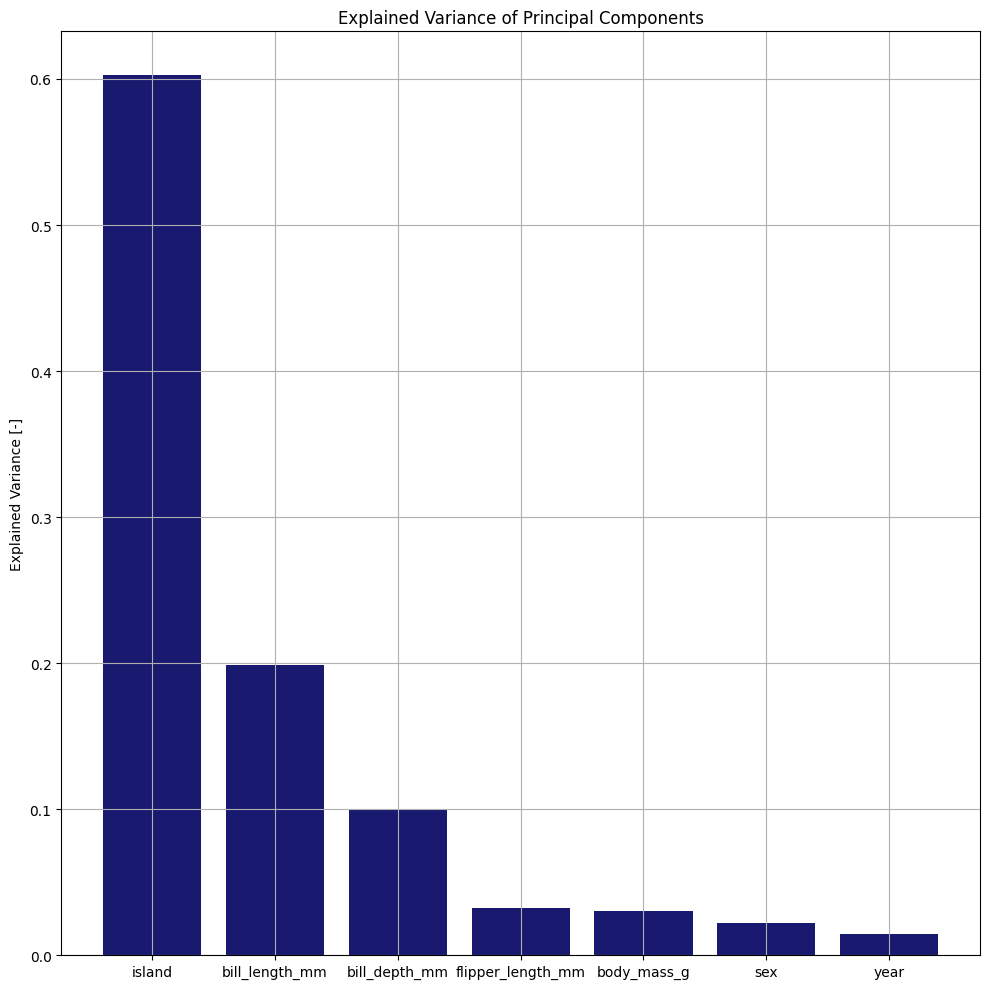

In [259]:
# Weight of the principal components in a bar diagram
print(pca.explained_variance_ratio_)

# Plot the bar diagram
plt.figure(figsize=(10, 10))
plt.grid()
plt.bar(attributeNames[1:], pca.explained_variance_ratio_, color ='#191970')
plt.ylabel('Explained Variance [-]')
plt.title('Explained Variance of Principal Components')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

[0.60251391 0.80098199 0.90059287 0.93284243 0.96340781 0.98539557
 1.        ]


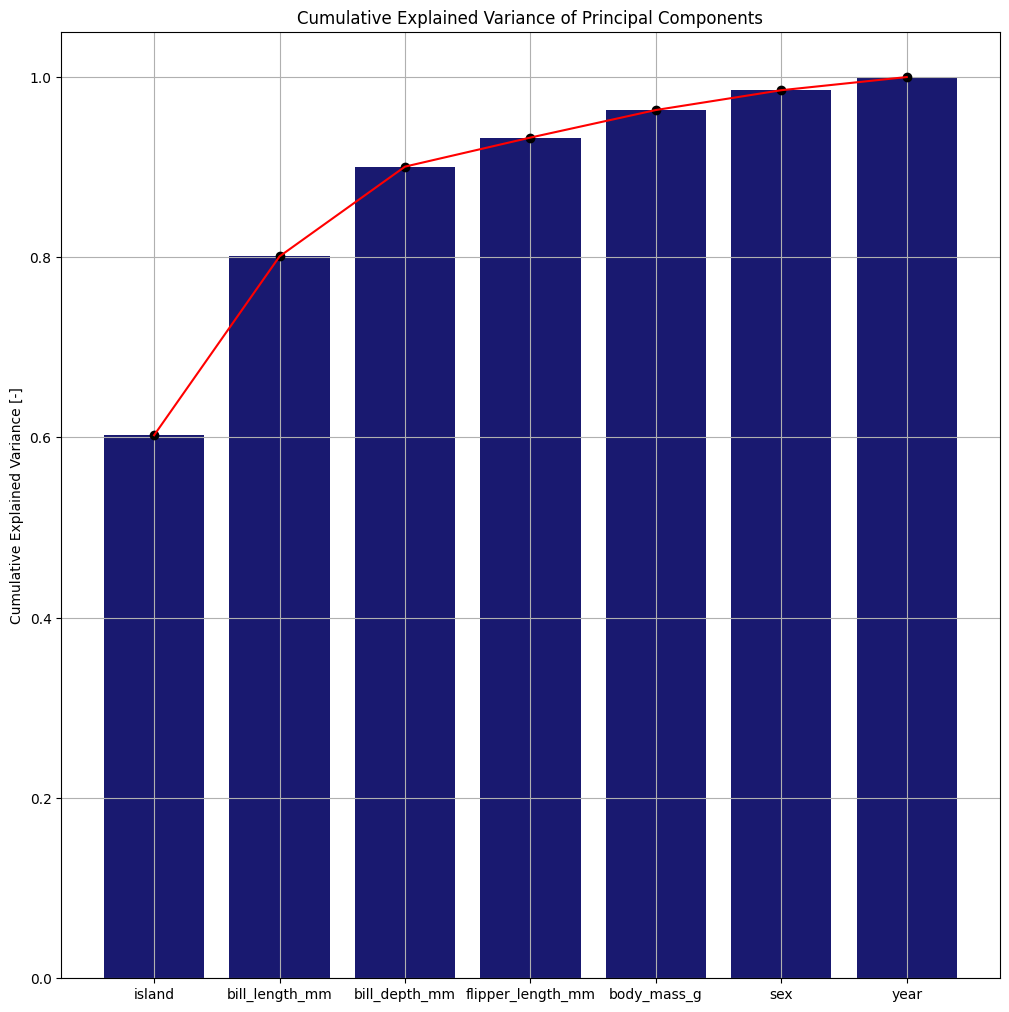

In [260]:
# Comulative explained variance plot

# Calculate the cumulative explained variance
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_exp_var)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 10))
plt.grid()
plt.bar(attributeNames[1:], cum_exp_var, color ='#191970')
plt.plot(cum_exp_var, 'ok')
plt.plot(cum_exp_var, color='red')
plt.tight_layout()
plt.ylabel('Cumulative Explained Variance [-]')
plt.title('Cumulative Explained Variance of Principal Components')
plt.show()
